In [1]:
%pylab inline
import pynbody

Populating the interactive namespace from numpy and matplotlib


In [65]:
def dgs(z):
    densidad=((3*(70.3**2)*(0.045))/(8*np.pi*(4.3e-9)*1e10)) * (1+z)**3
    return densidad

In [56]:
dgs(3)

ELEMENTOS PARA EL UNIVERSO A Z=0

In [4]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
s0=pynbody.load(path+'snapshot_050')
a0=s0.properties['a']

In [5]:
gas0=s0.gas
pos0=gas0['pos']
ne0=gas0['ne']
u0=gas0['u']
rho0=gas0['rho']/a0**3
rho0c=gas0['rho']

In [22]:
xbox=403.8960 
ybox=459.8882
zbox=440.9021 
xc=408.205481 - xbox + 250 
yc=457.777839 - ybox + 250   
zc=441.538681 - zbox + 250
r0=np.sqrt((pos0[:,0]-xc)**2+(pos0[:,1]-yc)**2+(pos0[:,2]-zc)**2)
maxdist=8

xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10

mu=(1.0-yHe)/(1+yHe+ne0)
te0=(5./3.-1.)*u0*vv*mu*(mp/kcgs)

cut0,=np.where(r0<maxdist)

ELEMENTOS PARA EL UNIVERSO A OTRO REDSHIT

In [68]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
s1=pynbody.load(path+'snapshot_030')
a1=s1.properties['a']

In [69]:
gas1=s1.gas
pos1=gas1['pos']
ne1=gas1['ne']
u1=gas1['u']
rho1=gas1['rho']/a1**3
rho1c=gas1['rho']
z1=1/a1-1

In [70]:
r1=np.sqrt((pos1[:,0]-xc)**2+(pos1[:,1]-yc)**2+(pos1[:,2]-zc)**2)
maxdist=12
mindist=10

mu=(1.0-yHe)/(1+yHe+ne1)
te1=(5./3.-1.)*u1*vv*mu*(mp/kcgs)

cut1,=np.where((r1<maxdist) & (r1>mindist))

In [71]:
z1

2.3144540039584003

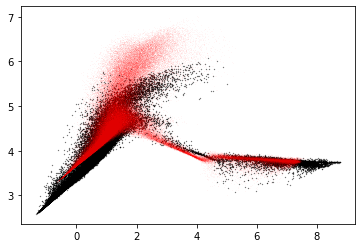

In [72]:
dmean=dgs(5)
plt.plot(np.log10(rho0[cut0]),np.log10(te0[cut0]),'.k',markersize=.5,alpha=.9)
plt.plot(np.log10(rho1[cut1]/dgs(z1)),np.log10(te1[cut1]),'.r',markersize=.1,alpha=.23)

In [66]:
print(dgs(5.03))


135.35928127091321
